# LENDING CLUB CASE STUDY 
## Group Members :
1. Karthick Chetti 
2. Anirudh KVC

## Objectives :
1. Reduce Credit loss from 'charged-off' customers who are the 'defaulters'. (Lending loans to ‘risky’ applicants) which is largest source of financial loss
2. Understand the driving factors (or driver variables) behind loan default

## Data Cleaning

### Task 1 : Removing the unnecessary columns based on its relevance to the objective

#### 1. id	& member_id are unique and shouldn't influence the loan_status
#### 2. emp_title - contains subjective information and irrevelant to analyze


### Task 2 : Format Correction of Columns

#### 1. term - remove months from each cell and convert to int

### Task 3 : Relevant Columns
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_length
home_ownership
annual_inc
verification_status
loan_status
purpose
addr_state
dti
delinq_2yrs
earliest_cr_line
mths_since_last_delinq
open_acc
pub_rec
revol_bal
revol_util
total_acc
last_pymnt_d
pub_rec_bankruptcies



In [87]:
#Load the libraryss
import pandas as pd #To work with dataset
pd.set_option("display.max_columns", 100)
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from matplotlib.ticker import PercentFormatter # for percentage

In [50]:
#Importing data
lc_df=pd.read_csv("loan.csv")

C:\Users\kvc06\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Key features
# id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,purpose,zip_code,add_state
# 

In [51]:
#Looking at the data
lc_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [52]:
#Understanding the data
lc_df.info(verbose=True,show_counts=True)

# As we are interested in understanding charged off customers loan status as current is not useful for the analysis
# Filtering data accorgingly

lc_df = lc_df[~ (lc_df["loan_status"] == "Current") ]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [53]:
#Removing columns having 50% null values in them as such data is not useful
lc_df_nulldrop=lc_df.dropna(axis=1,thresh=int(0.5*len(lc_df)))

In [54]:
#Printing number of columns removed
removed_columns=len(lc_df.columns)-len(lc_df_nulldrop.columns)
print(f"{removed_columns} columns were removed")

57 columns were removed


In [55]:
#Checking the statistics of the new dataframe
lc_df_nulldrop.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.0,0.0,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.0,0.0,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### It is observed that some columns have only one value(mostly 0) throughout the rows, which are not useful for the analysis

In [56]:
#Dropping such columns in the dataframe
dropped_col=[]
for col in lc_df_nulldrop.columns:
    if len(lc_df_nulldrop[col].unique())==1:
        dropped_col.append(col)
print(f"The columns to be dropped are : {dropped_col}")
lc_df_droppedcol=lc_df_nulldrop.drop(dropped_col,axis=1)

The columns to be dropped are : ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


### Dropping columns based on their relevance to the business objective
#### 1. id ,member id and url will be specific to each customer 
#### 2. title,emp_title,desc - Very subjective and unstructured values in these columns

In [57]:
#Collecting all non relevant columns
non_relevant_cols=["id","member_id","url","title","emp_title","desc"]
#Dropping these columns
lc_df_droppedcol.drop(non_relevant_cols,axis=1,inplace=True)

In [58]:
lc_df_droppedcol.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  object 
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_d                     38577 non-null  object 
 13  loan_status                 385

### It is observed that some columns still have missing values and 0 as only values in column
#### collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens

In [59]:
print("Unique values of collections_12_mths_ex_med column :",lc_df_droppedcol["collections_12_mths_ex_med"].unique())
print("Unique values of chargeoff_within_12_mths column :",lc_df_droppedcol["chargeoff_within_12_mths"].unique())
print("Unique values of tax_liens column :",lc_df_droppedcol["tax_liens"].unique())
#Hence, dropping these columns
lc_df_droppedcol.drop(["collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens"],axis=1,inplace=True)

Unique values of collections_12_mths_ex_med column : [ 0. nan]
Unique values of chargeoff_within_12_mths column : [ 0. nan]
Unique values of tax_liens column : [ 0. nan]


In [60]:
lc_df_droppedcol.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [61]:
lc_df_droppedcol.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

### There are still some columns which have missing values, Therefore understanding the number of missing values in these columns

In [62]:
empty_cols=lc_df_droppedcol.columns[lc_df_droppedcol.isna().any()].tolist()
empty_vals=[lc_df_droppedcol[col].isna().sum() for col in empty_cols]
empty_per_dict=dict(zip(empty_cols,empty_vals))
print("The missing values in each column is :\n",empty_per_dict)

The missing values in each column is :
 {'emp_length': 1033, 'revol_util': 50, 'last_pymnt_d': 71, 'last_credit_pull_d': 2, 'pub_rec_bankruptcies': 697}


### Missing Value Imputation

In [63]:
#Add mean and median to missing values

### Fixing data types of columns

In [64]:
#Removing % and converting to float
lc_df_droppedcol["int_rate"]=lc_df_droppedcol["int_rate"].str.replace("%","").astype(float)
lc_df_droppedcol["revol_util"]=lc_df_droppedcol["revol_util"].str.replace("%","").astype(float)

## Checking Data Distributions for Numeric Data

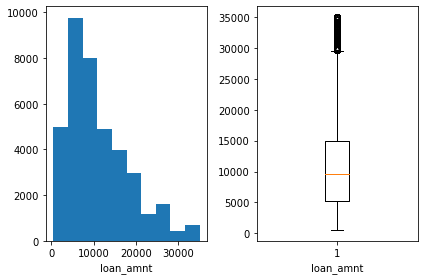

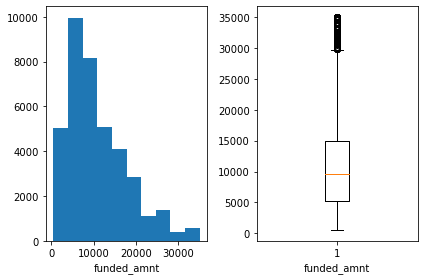

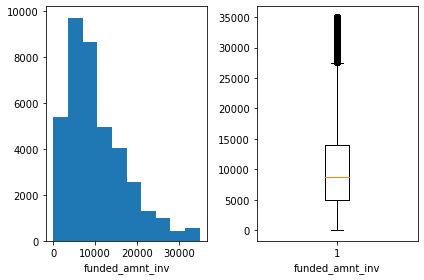

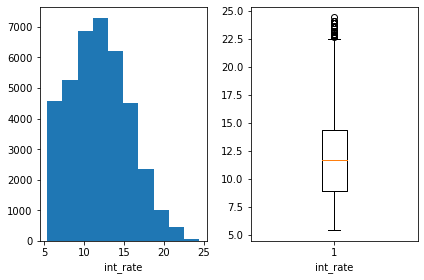

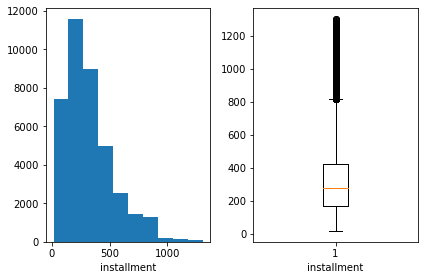

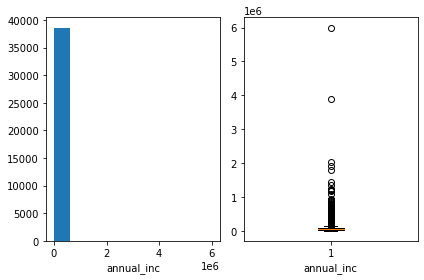

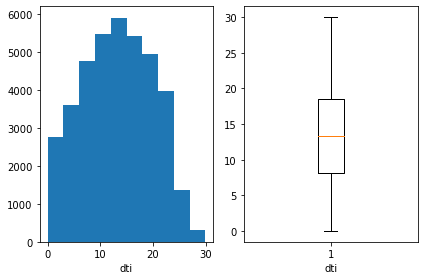

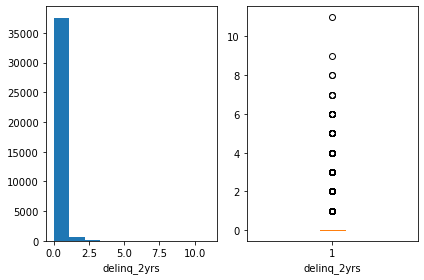

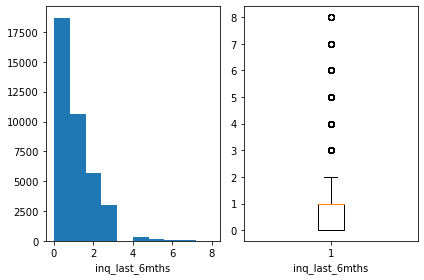

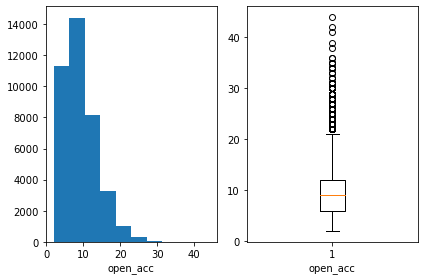

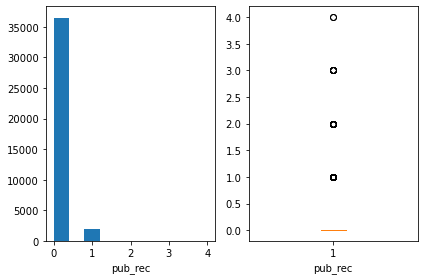

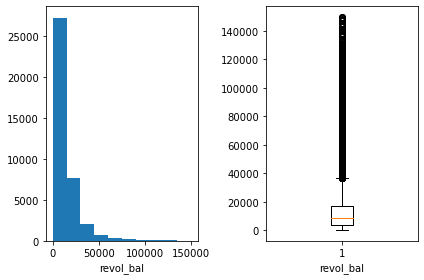

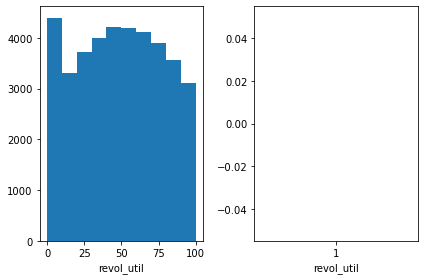

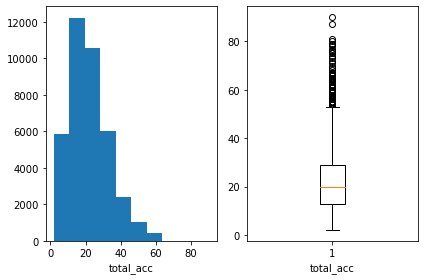

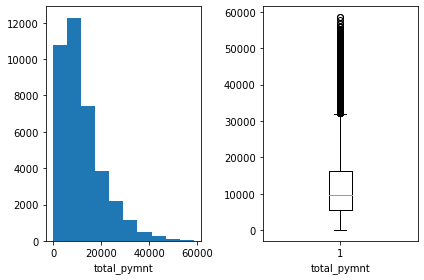

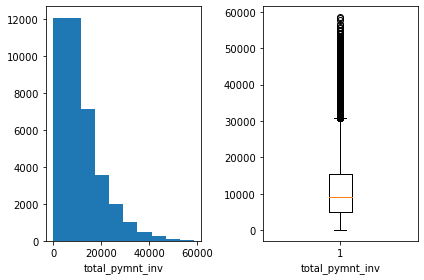

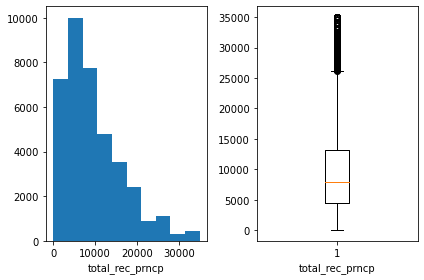

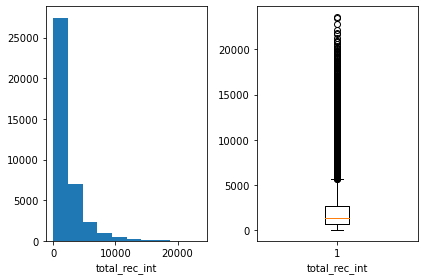

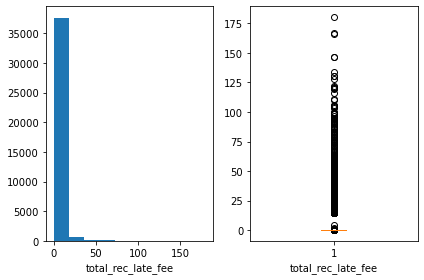

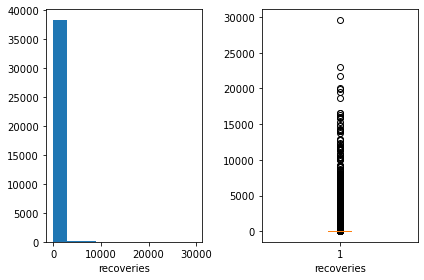

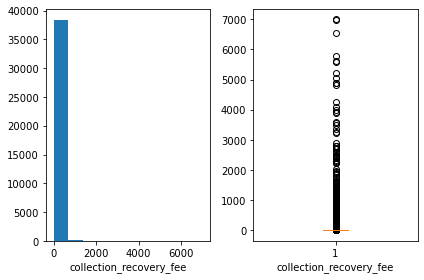

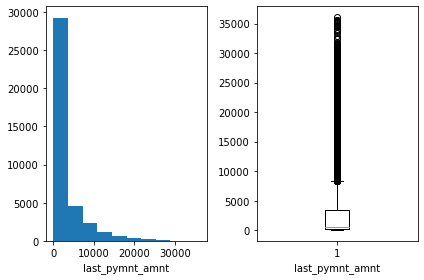

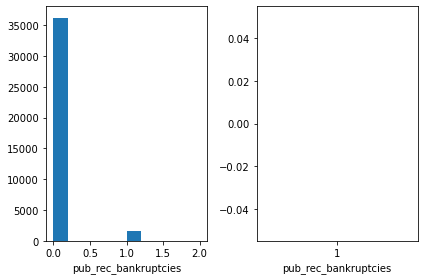

In [65]:
#Checking the distributions for numeric data and identifying relevant columns for business objective
def box_plot_col(df):
    i=1
    for col in df.columns:
        if df[col].dtype in ["int64","float64"]:
            plt.subplot(1, 2, 1)
            plt.hist(df[col])
            plt.xlabel(col)
            plt.subplot(1, 2, 2)
            plt.boxplot(df[col])
            plt.xlabel(col)
            plt.tight_layout()
            plt.show()
box_plot_col(lc_df_droppedcol)

## EDA for Business Objective 1 :
### Reduce Credit loss from 'charged-off' customers who are the 'defaulters'. (Lending loans to ‘risky’ applicants) which is largest source of financial loss

In [75]:
lc_df_droppedcol[lc_df_droppedcol["loan_status"]=="Charged Off"]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.6,13,646.02,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.5,3,1476.19,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0
12,9000,9000,9000.0,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.7,9,2270.70,2270.70,1256.14,570.26,0.00,444.30,4.1600,Jul-12,305.38,Nov-12,0.0
14,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,Dec-11,Charged Off,other,951xx,CA,7.06,0,May-91,2,14,0,11997,55.5,29,7471.99,7471.99,5433.47,1393.42,0.00,645.10,6.3145,Oct-13,325.74,Mar-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,2500,2500,675.0,36 months,12.80,84.00,D,D4,< 1 year,MORTGAGE,32000.0,Not Verified,Aug-07,Charged Off,home_improvement,685xx,NE,20.00,0,Jul-92,1,11,0,3408,35.1,32,2220.61,599.28,1706.01,477.21,1.69,35.70,0.3800,Mar-10,1.76,May-16,NaN
39668,2500,2500,825.0,36 months,9.64,80.26,B,B4,< 1 year,MORTGAGE,75000.0,Not Verified,Aug-07,Charged Off,home_improvement,685xx,NE,20.00,0,Feb-94,3,9,0,269,3.8,35,2086.63,688.35,1730.83,354.44,1.36,0.00,0.0000,Mar-10,1.40,May-16,NaN
39669,6500,6500,225.0,36 months,15.01,225.37,F,F1,9 years,MORTGAGE,213000.0,Not Verified,Aug-07,Charged Off,small_business,300xx,GA,6.45,0,Jul-90,0,11,0,56411,75.3,28,4054.35,139.42,2886.21,1168.14,0.00,0.00,0.0000,Feb-09,225.37,May-16,NaN
39678,1000,1000,950.0,36 months,10.59,32.55,C,C2,2 years,MORTGAGE,33990.0,Not Verified,Aug-07,Charged Off,wedding,245xx,VA,14.47,0,Jul-04,1,9,0,4485,36.9,11,703.95,668.87,544.02,138.64,0.00,21.29,0.2300,May-09,32.55,Oct-09,NaN


In [148]:
lc_df_droppedcol[lc_df_droppedcol["loan_status"]=="Fully Paid"]["term"].value_counts().values

array([25869,  7081], dtype=int64)

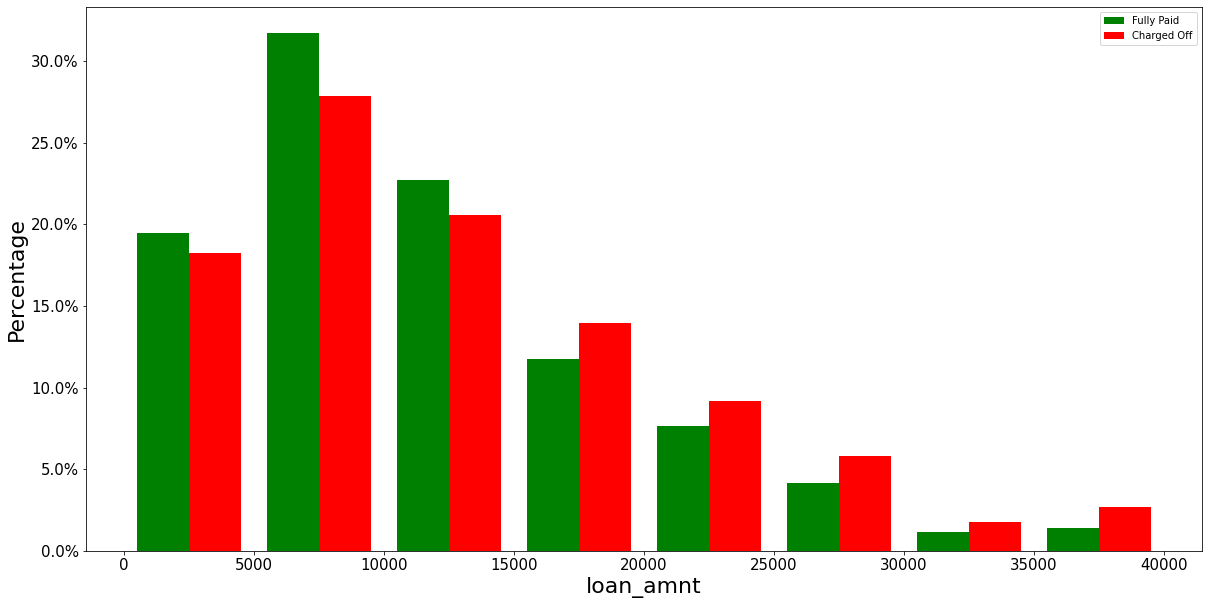

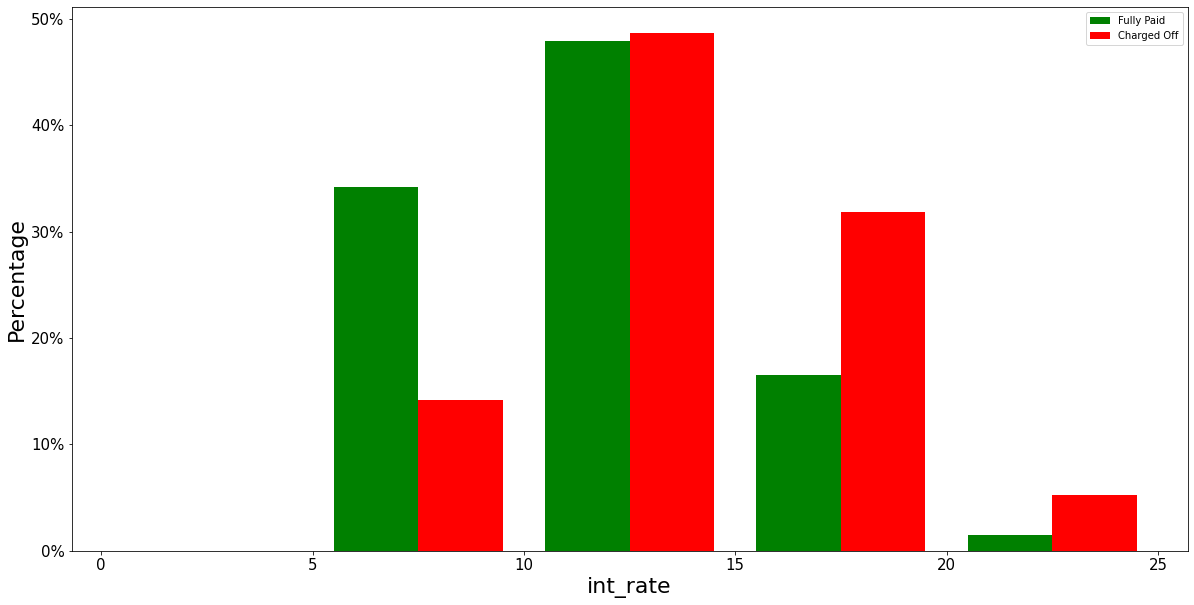

TypeError: only size-1 arrays can be converted to Python scalars

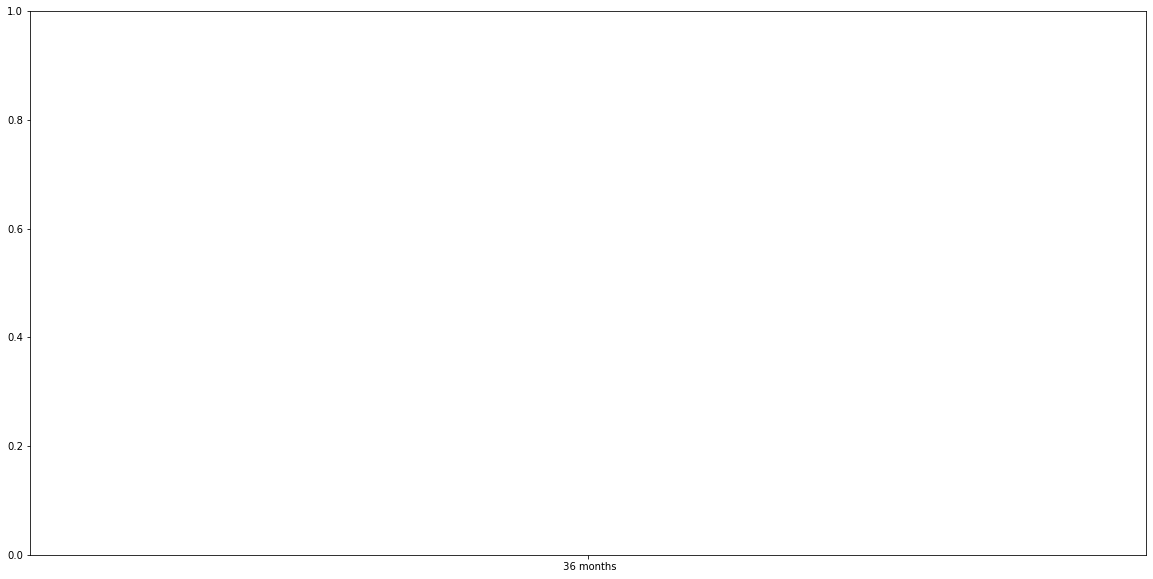

In [150]:
# Bivariate Analysis
# Plotting graphs wrt columns as percentage


def plot_hist(df,column_name,bins):
    plot_data = (df[df["loan_status"]=="Fully Paid"][column_name],df[df["loan_status"]=="Charged Off"][column_name])
    #weight_data= (np.ones(len(plot_data[0])) / len(plot_data[0]+plot_data[1]),np.ones(len(plot_data[1])) / len(plot_data[0]+plot_data[1]))
    weight_data= (np.ones(len(plot_data[0])) / len(plot_data[0]),np.ones(len(plot_data[1])) / len(plot_data[1]))
    plt.figure(figsize=(20,10))
    n,bin_data,patches=plt.hist(plot_data,color=("g","r"),weights=weight_data,bins=bins)
    #plt.hist(plot_data,color=("g","r"))
    plt.xlabel(column_name,fontsize=22)
    plt.ylabel("Percentage",fontsize=22)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(("Fully Paid","Charged Off"))
    plt.show()
    return n,bin_data,patches

def plot_hist_cat(df,column_name,width):
    df.plot.hist(column=["age"], by="gender", figsize=(10, 8))
    plt.figure(figsize=(20,10))
    plot_data = (df[df["loan_status"]=="Fully Paid"][column_name].value_counts().index)
    #plot_data = (df[df["loan_status"]=="Fully Paid"][column_name].value_counts().index,df[df["loan_status"]=="Charged Off"][column_name].value_counts().index)
    count_data = (df[df["loan_status"]=="Fully Paid"][column_name].value_counts().values,df[df["loan_status"]=="Charged Off"][column_name].value_counts().values)
    plt.bar(plot_data, count_data, width=width)
    plt.xlabel(column_name,fontsize=22)
    plt.ylabel("Frequency",fontsize=22)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(("Fully Paid","Charged Off"))
    plt.show()
    
a1,b1,c1=plot_hist(lc_df_droppedcol,"loan_amnt",np.linspace(0,40000,num=9))
a2,b2,c2 = plot_hist(lc_df_droppedcol,"int_rate",np.linspace(0,25,num=6))
plot_hist_cat(lc_df_droppedcol,"term",0.5)


print(a1)
print(b1)
print(c1)

#plot_hist(lc_df_droppedcol,"annual_inc",50)



AttributeError: 'Rectangle' object has no property 'column'

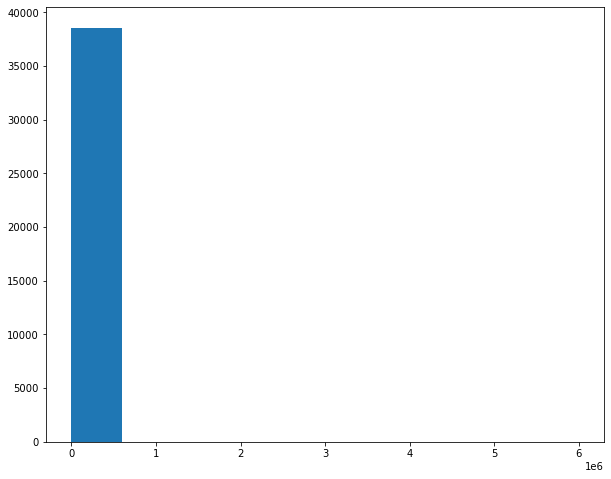

In [151]:
lc_df_droppedcol.plot.hist(column=["term"], by="loan_status", figsize=(10, 8))

In [ ]:
# Insights from the histogram
# No loan is offered from 0 to 5 % interest rate

# wrt interest rate
#1) Around 48% of the charged of customers fall under interest rate of 10 to 15 percentage
#2) 85 % of the charged off customers have taken the loan at an interest rate of > 10 %

# wrt loan_amnt
#1) 82 % of the charged customers have taken the loan amount > 5000
#2) 50 % of fully paid customers have taken the loan amont < 10000

In [67]:
num_cols=[]
for col in lc_df_droppedcol.columns:
    if lc_df_droppedcol[col].dtype in ["int64","float64"]:
        num_cols.append(col)
num_df_corr=lc_df_droppedcol[num_cols].corr()
num_df=lc_df_droppedcol[num_cols]

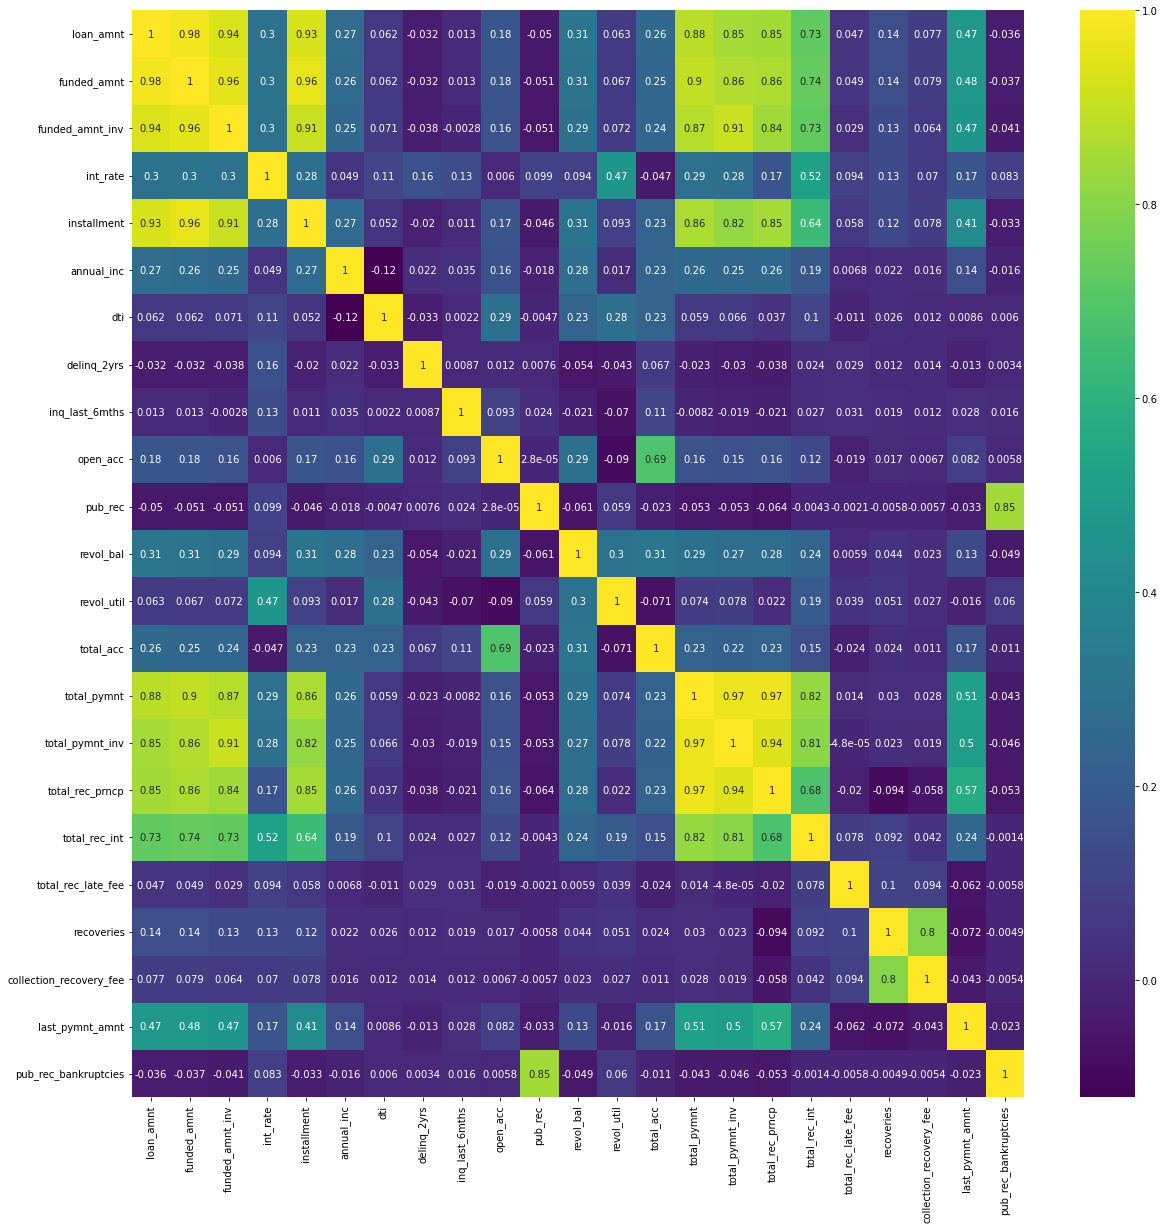

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(num_df_corr,cmap="viridis",annot=True)
plt.show()

In [69]:
num_df.iloc[:,1:3]

,funded_amnt,funded_amnt_inv
0,5000,4975.0
1,2500,2500.0
2,2400,2400.0
3,10000,10000.0
5,5000,5000.0
...,...,...
39712,2500,1075.0
39713,8500,875.0
39714,5000,1325.0
39715,5000,650.0


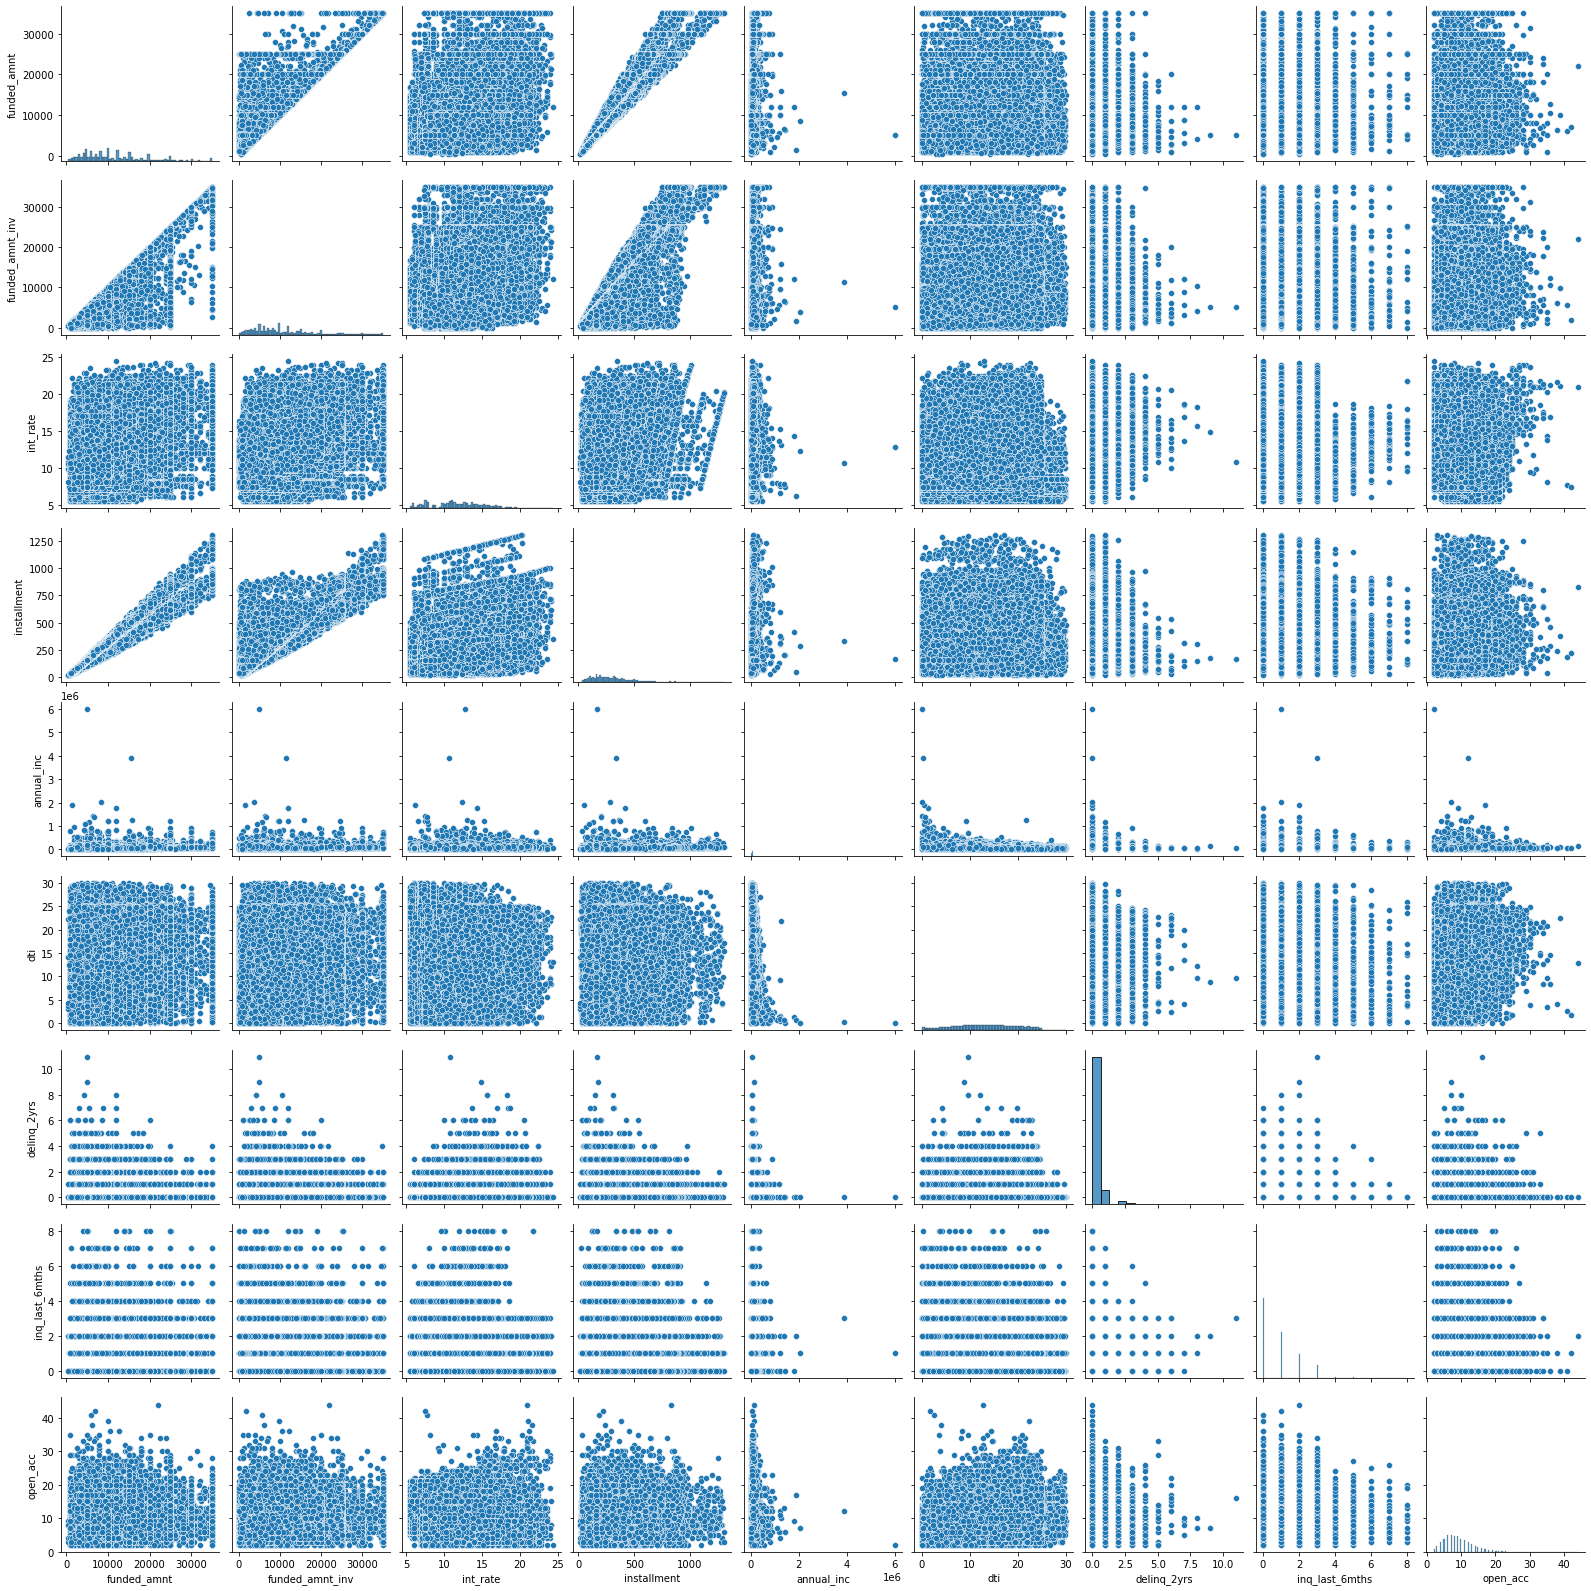

In [70]:
sns.pairplot(num_df.iloc[:,1:10])
plt.show()

In [71]:
### Derived Metrics
#### earliest_cr_line to year
#### closed acc = total - open acc
#### ratio of funded_amt_inv to loan_amt